In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f3bdfb19f71b866aaf70b60648b7b31


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# creat an empty list to hold the weather data
city_data =  []

#Print the beginning of the logging
print("Beginning Data Retrieval       ")
print("-------------")

#create Counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
       
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval       
-------------
Processing Record 1 of Set 1 | marathon
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | esperance
Processing Record 5 of Set 1 | saldanha
Processing Record 6 of Set 1 | uray
Processing Record 7 of Set 1 | fortuna
Processing Record 8 of Set 1 | codrington
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 13 of Set 1 | banatsko novo selo
Processing Record 14 of Set 1 | lolua
City not found. Skipping...
Processing Record 15 of Set 1 | vanimo
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | half moon bay
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | upernavik
Processing Record 20 of Set 1 | jamtara
Processing Record 21 of Set 1 | avarua
Processing Rec

Processing Record 40 of Set 4 | siderno
Processing Record 41 of Set 4 | olafsvik
Processing Record 42 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 43 of Set 4 | bulawayo
Processing Record 44 of Set 4 | skjervoy
Processing Record 45 of Set 4 | chumikan
Processing Record 46 of Set 4 | isangel
Processing Record 47 of Set 4 | sinkat
City not found. Skipping...
Processing Record 48 of Set 4 | hailin
Processing Record 49 of Set 4 | thompson
Processing Record 50 of Set 4 | tecpan
Processing Record 1 of Set 5 | cooma
Processing Record 2 of Set 5 | lima
Processing Record 3 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 4 of Set 5 | tuatapere
Processing Record 5 of Set 5 | yongan
Processing Record 6 of Set 5 | big rapids
Processing Record 7 of Set 5 | yumen
Processing Record 8 of Set 5 | kysyl-syr
Processing Record 9 of Set 5 | arraial do cabo
Processing Record 10 of Set 5 | katsuura
Processing Record 11 of Set 5 | jimenez
Processing Record 12 of Set 5

Processing Record 28 of Set 8 | constitucion
Processing Record 29 of Set 8 | vila velha
Processing Record 30 of Set 8 | mrirt
City not found. Skipping...
Processing Record 31 of Set 8 | hvide sande
Processing Record 32 of Set 8 | nouadhibou
Processing Record 33 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 34 of Set 8 | sorong
Processing Record 35 of Set 8 | laguna
Processing Record 36 of Set 8 | namtsy
Processing Record 37 of Set 8 | areosa
Processing Record 38 of Set 8 | baiyin
Processing Record 39 of Set 8 | khorinsk
Processing Record 40 of Set 8 | maarianhamina
Processing Record 41 of Set 8 | tezu
Processing Record 42 of Set 8 | gigmoto
Processing Record 43 of Set 8 | ponta delgada
Processing Record 44 of Set 8 | sistranda
Processing Record 45 of Set 8 | grand island
Processing Record 46 of Set 8 | sobolevo
Processing Record 47 of Set 8 | vogosca
Processing Record 48 of Set 8 | pecos
Processing Record 49 of Set 8 | limon
Processing Record 50 of Set 8 | chuguyevka

Processing Record 19 of Set 12 | san lorenzo
Processing Record 20 of Set 12 | rocky mountain house
Processing Record 21 of Set 12 | suruc
Processing Record 22 of Set 12 | ancud
Processing Record 23 of Set 12 | gulshat
City not found. Skipping...
Processing Record 24 of Set 12 | guerrero negro
Processing Record 25 of Set 12 | havoysund
Processing Record 26 of Set 12 | ushtobe
Processing Record 27 of Set 12 | satitoa
City not found. Skipping...
Processing Record 28 of Set 12 | amahai
Processing Record 29 of Set 12 | pangody
Processing Record 30 of Set 12 | te anau
Processing Record 31 of Set 12 | sangar
Processing Record 32 of Set 12 | chibuto
Processing Record 33 of Set 12 | rundu
Processing Record 34 of Set 12 | geraldton
Processing Record 35 of Set 12 | hambantota
Processing Record 36 of Set 12 | saint combs
City not found. Skipping...
Processing Record 37 of Set 12 | san cristobal
Processing Record 38 of Set 12 | yatou
Processing Record 39 of Set 12 | biak
Processing Record 40 of Set

In [10]:
# convert the array of dcit to a pandas DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Marathon,44.9000,-89.7668,62.31,65,75,12.19,US,2021-05-26 17:59:28
1,Kapaa,22.0752,-159.3190,73.18,59,9,8.84,US,2021-05-26 17:59:28
2,Esperance,-33.8667,121.9000,53.44,65,97,15.01,AU,2021-05-26 17:59:28
3,Saldanha,-33.0117,17.9442,57.25,80,91,5.41,ZA,2021-05-26 17:59:29
4,Uray,60.1247,64.7758,43.72,91,100,14.72,RU,2021-05-26 17:59:29
5,Fortuna,40.5982,-124.1573,56.66,93,90,4.61,US,2021-05-26 17:59:29
6,Codrington,-38.2667,141.9667,53.67,83,46,15.23,AU,2021-05-26 17:59:29
7,Bluff,-46.6000,168.3333,40.84,84,57,11.72,NZ,2021-05-26 17:59:30
8,East London,-33.0153,27.9116,63.54,88,75,5.75,ZA,2021-05-26 17:59:30
9,Khatanga,71.9667,102.5000,27.34,96,99,9.98,RU,2021-05-26 17:59:30


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", 'Max Temp', "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Marathon,US,2021-05-26 17:59:28,44.9000,-89.7668,62.31,65,75,12.19
1,Kapaa,US,2021-05-26 17:59:28,22.0752,-159.3190,73.18,59,9,8.84
2,Esperance,AU,2021-05-26 17:59:28,-33.8667,121.9000,53.44,65,97,15.01
3,Saldanha,ZA,2021-05-26 17:59:29,-33.0117,17.9442,57.25,80,91,5.41
4,Uray,RU,2021-05-26 17:59:29,60.1247,64.7758,43.72,91,100,14.72


In [13]:
#CREATE THE OUTPUT FILE (csv)
output_data_file = "weather_data/cities.csv"

#export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

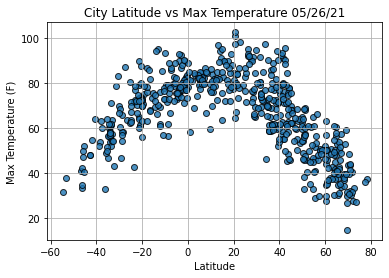

In [15]:
#import time module
import time

#build the scatter plot for latitude vs max temp
plt.scatter(lats, max_temps,
           edgecolor = "black",
           linewidths = 1,
           marker = "o",
           alpha = .8,
           label = "Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the fig
plt.savefig("weather_data/Fig1.png")

plt.show()

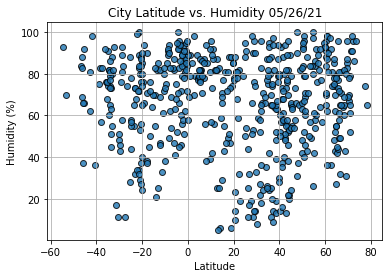

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats, humidity,
            edgecolor="black", 
            linewidths=1, 
            marker="o",
            alpha=0.8, 
            label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

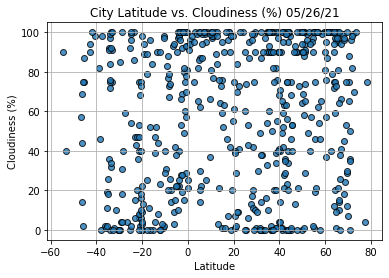

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats, cloudiness,
            edgecolor="black", 
            linewidths=1, 
            marker="o",
            alpha=0.8, 
            label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

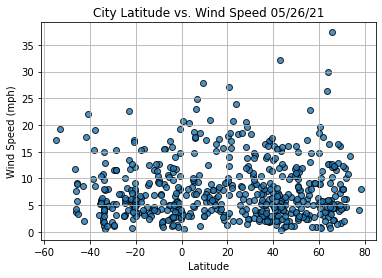

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats, wind_speed,
            edgecolor="black", 
            linewidths=1, 
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                Half Moon Bay
Country                        US
Date          2021-05-26 17:55:48
Lat                       37.4636
Lng                     -122.4286
Max Temp                    76.89
Humidity                       64
Cloudiness                     20
Wind Speed                   7.54
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4       True
       ...  
550     True
551     True
552     True
553     True
554     True
Name: Lat, Length: 555, dtype: bool

In [22]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

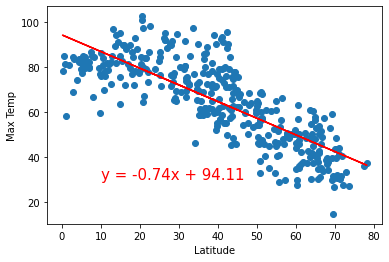

In [23]:
#linear regression on the norther hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for Maximum Temperature', 'Max Temp', (10,30))

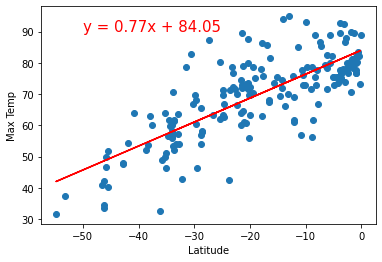

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

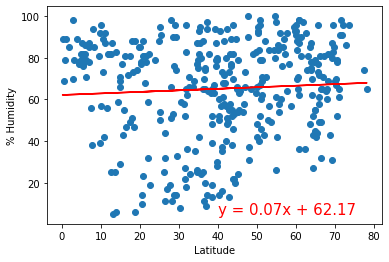

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,5))

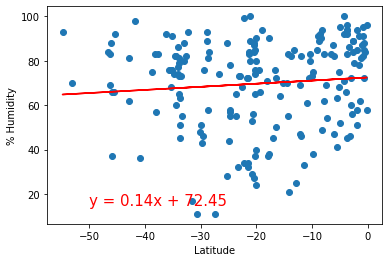

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                    'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

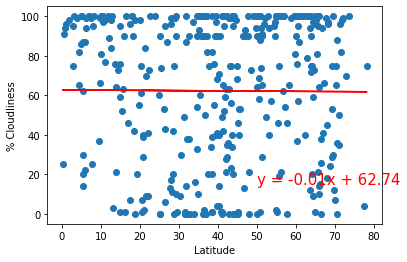

In [29]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                    'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudliness',(50,15))

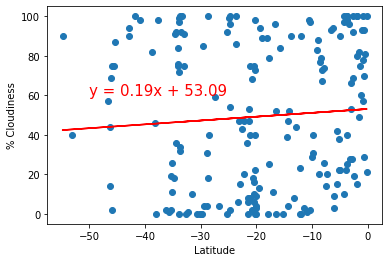

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

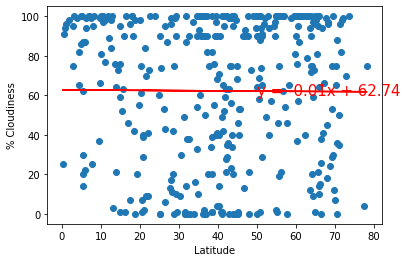

In [33]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(50,60))

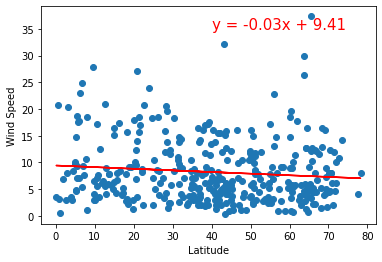

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

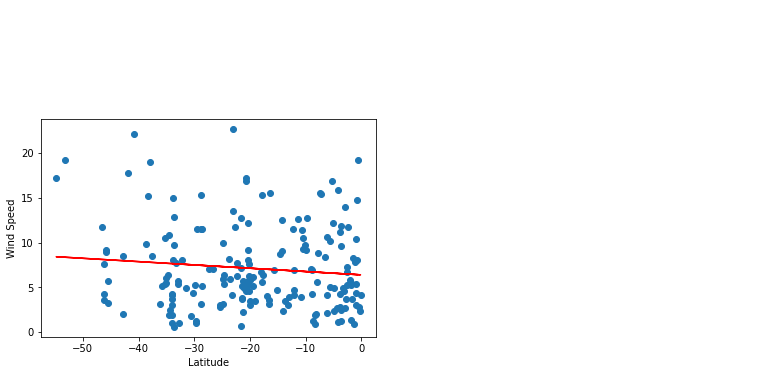

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(50,35))